In [27]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/'W266 Final Project'

'Colab Notebooks'	       explicit_features_de.csv
'Dataset Notes & Links.gdoc'  'W266 - Results Table .gsheet'
 explicit_features.csv


In [4]:
df_de = pd.read_csv('drive/MyDrive/W266 Final Project/explicit_features_de.csv')
df_en = pd.read_csv('drive/MyDrive/W266 Final Project/explicit_features.csv')
df_en.head()

,lp,src,mt,ref,score,system,annotators,domain,year,Reference Token Count,...,Novel Terms,Length Ratio,Engram Overlap 1,Engram Overlap 2,Engram Overlap 3,Engram Overlap 4,Engram Overlap 5,Substitutions,Deletions,Insertions
0,zh-en,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,State-owned enterprises and advantageous priva...,-5.666667,DeepMind.381,3,news,2020,19,...,0.176471,0.947368,0.789474,0.555556,0.352941,0.187500,0.066667,"[2, 1]",[1],[1]
1,zh-en,9月26日至27日，为深化拓展“不忘初心、牢记使命”主题教育成果，中央军民融合办、国家国防科...,"From September 26 to 27, in order to deepen an...","From September 26 to 27, in order to deepen an...",-16.066667,DeepMind.381,3,news,2020,140,...,0.345238,0.928571,0.757143,0.446043,0.304348,0.233577,0.191176,"[1, 8, 2, 4, 3, 5, 1, 3, 2, 1, 3, 1, 1, 3, 1, ...","[2, 1, 6, 1]","[2, 1, 1, 2]"
2,zh-en,中央军民融合办常务副主任金壮龙，中央统战部副部长、全国工商联党组书记、常务副主席徐乐江，国家...,"Jin Zhuanglong, Deputy Director of the Central...","Jin Zhuanglong, executive deputy director of t...",-18.666667,DeepMind.381,3,news,2020,104,...,0.150943,0.817308,0.826923,0.592233,0.480392,0.415842,0.360000,"[3, 2, 3, 4, 4, 1]","[1, 2, 5, 6, 1, 1]","[2, 1]"
3,zh-en,参加调研活动的企业有中国航天科技集团有限公司等8家军工集团公司、湖南稀土金属材料研究院等10...,The enterprises participating in the research ...,The enterprises participating in the survey in...,-14.333333,DeepMind.381,3,news,2020,51,...,0.195122,1.098039,0.882353,0.680000,0.530612,0.416667,0.319149,"[3, 2, 6, 2, 2]","[1, 1]",[]
4,zh-en,其间，调研人员参观了中央红军长征出发地纪念园，缅怀了革命先烈，接受了革命传统教育，回顾了红军...,"During this period, the researchers visited th...","During the survey, representatives visited the...",-6.366667,DeepMind.381,3,news,2020,69,...,0.415094,1.275362,0.753623,0.411765,0.238806,0.151515,0.076923,"[3, 1, 3, 1, 2, 2, 6, 2, 4, 1, 5, 1]","[3, 2]","[3, 8, 3, 1, 1]"


In [5]:
substitution_totals = []
deletion_totals = []
insertion_totals = []

for idx, row in df_en.iterrows():
  sub_total = 0
  deletion_total = 0
  insertion_total = 0
  for item in row['Substitutions'][1:-1].split(", "):
    if item != '':
      sub_total += int(item)
  for item in row['Deletions'][1:-1].split(", "):
    if item != '':
      deletion_total += int(item)
  for item in row['Insertions'][1:-1].split(", "):
    if item != '':
      insertion_total += int(item)
  #print(row['Insertions'], insertion_total)
  substitution_totals.append(sub_total)
  deletion_totals.append(deletion_total)
  insertion_totals.append(insertion_total)

df_en['Deletion Total'] = deletion_totals
df_en['Substitution Total'] = substitution_totals
df_en['Insertion Total'] = insertion_totals

df_en.head()

,lp,src,mt,ref,score,system,annotators,domain,year,Reference Token Count,...,Engram Overlap 2,Engram Overlap 3,Engram Overlap 4,Engram Overlap 5,Substitutions,Deletions,Insertions,Deletion Total,Substitution Total,Insertion Total
0,zh-en,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,State-owned enterprises and advantageous priva...,-5.666667,DeepMind.381,3,news,2020,19,...,0.555556,0.352941,0.187500,0.066667,"[2, 1]",[1],[1],1,3,1
1,zh-en,9月26日至27日，为深化拓展“不忘初心、牢记使命”主题教育成果，中央军民融合办、国家国防科...,"From September 26 to 27, in order to deepen an...","From September 26 to 27, in order to deepen an...",-16.066667,DeepMind.381,3,news,2020,140,...,0.446043,0.304348,0.233577,0.191176,"[1, 8, 2, 4, 3, 5, 1, 3, 2, 1, 3, 1, 1, 3, 1, ...","[2, 1, 6, 1]","[2, 1, 1, 2]",10,48,6
2,zh-en,中央军民融合办常务副主任金壮龙，中央统战部副部长、全国工商联党组书记、常务副主席徐乐江，国家...,"Jin Zhuanglong, Deputy Director of the Central...","Jin Zhuanglong, executive deputy director of t...",-18.666667,DeepMind.381,3,news,2020,104,...,0.592233,0.480392,0.415842,0.360000,"[3, 2, 3, 4, 4, 1]","[1, 2, 5, 6, 1, 1]","[2, 1]",16,17,3
3,zh-en,参加调研活动的企业有中国航天科技集团有限公司等8家军工集团公司、湖南稀土金属材料研究院等10...,The enterprises participating in the research ...,The enterprises participating in the survey in...,-14.333333,DeepMind.381,3,news,2020,51,...,0.680000,0.530612,0.416667,0.319149,"[3, 2, 6, 2, 2]","[1, 1]",[],2,15,0
4,zh-en,其间，调研人员参观了中央红军长征出发地纪念园，缅怀了革命先烈，接受了革命传统教育，回顾了红军...,"During this period, the researchers visited th...","During the survey, representatives visited the...",-6.366667,DeepMind.381,3,news,2020,69,...,0.411765,0.238806,0.151515,0.076923,"[3, 1, 3, 1, 2, 2, 6, 2, 4, 1, 5, 1]","[3, 2]","[3, 8, 3, 1, 1]",5,31,16


In [6]:
substitution_totals = []
deletion_totals = []
insertion_totals = []

for idx, row in df_de.iterrows():
  sub_total = 0
  deletion_total = 0
  insertion_total = 0
  for item in row['Substitutions'][1:-1].split(", "):
    if item != '':
      sub_total += int(item)
  for item in row['Deletions'][1:-1].split(", "):
    if item != '':
      deletion_total += int(item)
  for item in row['Insertions'][1:-1].split(", "):
    if item != '':
      insertion_total += int(item)
  #print(row['Insertions'], insertion_total)
  substitution_totals.append(sub_total)
  deletion_totals.append(deletion_total)
  insertion_totals.append(insertion_total)

df_de['Deletion Total'] = deletion_totals
df_de['Substitution Total'] = substitution_totals
df_de['Insertion Total'] = insertion_totals

df_de.head()

,lp,src,mt,ref,score,system,annotators,domain,year,Reference Token Count,...,Engram Overlap 2,Engram Overlap 3,Engram Overlap 4,Engram Overlap 5,Substitutions,Deletions,Insertions,Deletion Total,Substitution Total,Insertion Total
0,en-de,Michael Jackson wore tape on his nose to get f...,"Michael Jackson trug Klebeband auf der Nase, u...",Ehemaliger Bodyguard berichtet: Michael Jackso...,-2.333333,eTranslation.737,3,news,2020,34,...,0.606061,0.468750,0.354839,0.233333,"[2, 2]","[9, 2]",[10],11,4,10
1,en-de,Michael Jackson's former bodyguard has claimed...,Michael Jacksons ehemaliger Bodyguard behaupte...,Der ehemalige Bodyguard von Michael Jackson be...,-3.333333,eTranslation.737,3,news,2020,54,...,0.396226,0.269231,0.176471,0.140000,"[3, 1, 1, 17, 1, 2]","[3, 2, 1]",[2],6,25,2
2,en-de,"Matt Fiddes, now a property developer and owne...","Matt Fiddes, heute Immobilienentwickler und Be...","Matt Fiddes, jetzt ein Bauträger und Inhaber e...",-2.666667,eTranslation.737,3,news,2020,89,...,0.352273,0.218391,0.151163,0.094118,"[9, 3, 3, 4, 4, 2, 1, 6, 11]","[2, 2, 2]",[8],6,43,8
3,en-de,"To get front pages, he would reportedly don su...","Um Titelseiten zu bekommen, soll er chirurgisc...","Um auf Titelseiten zu gelangen, trug er einen ...",-4.333333,eTranslation.737,3,news,2020,47,...,0.326087,0.222222,0.159091,0.116279,"[3, 2, 9, 4, 6]","[1, 6]",[5],7,24,5
4,en-de,We'll tell you what's true. You can form your ...,"Wir sagen Ihnen, was wahr ist. Sie können sich...",Wir sagen Ihnen die Fakten. Sie können sich da...,-0.000000,eTranslation.737,3,news,2020,31,...,0.733333,0.655172,0.571429,0.481481,[5],[2],[],2,5,0


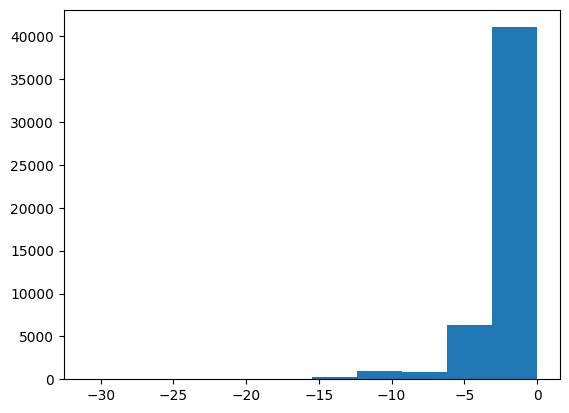

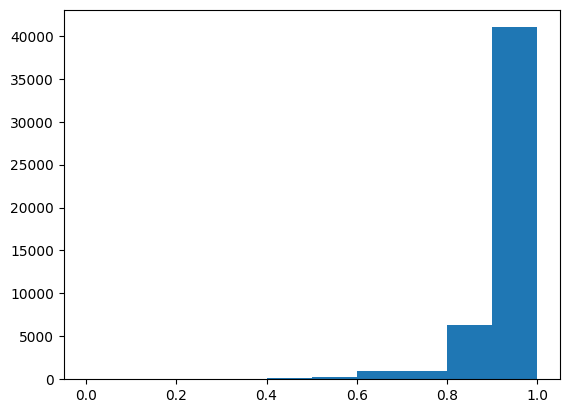

In [7]:
normalized_scores = np.array(df_de['score'])

plt.hist(normalized_scores)
plt.show()

normalized_scores[normalized_scores < -30] = -30

normalized_scores -= normalized_scores.min()
normalized_scores /= normalized_scores.max()

plt.hist(normalized_scores)
plt.show()

df_de['Normalized Scores'] = normalized_scores

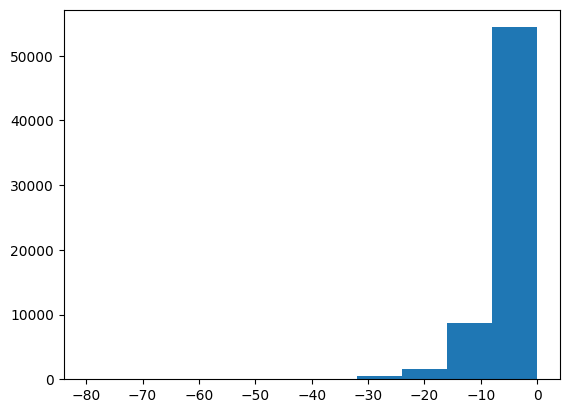

In [8]:
normalized_scores = np.array(df_en['score'])

plt.hist(normalized_scores)
plt.show()

In [9]:
normalized_scores[normalized_scores < -30] = -30

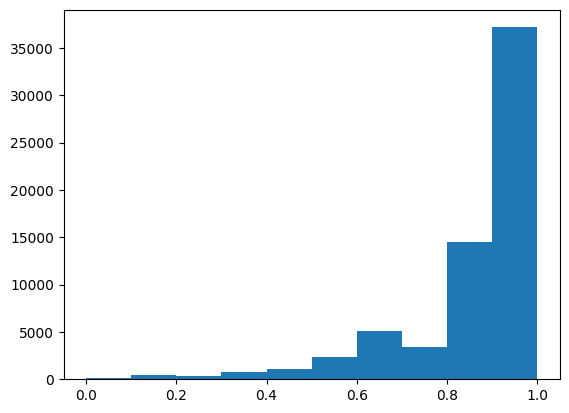

In [10]:
normalized_scores -= normalized_scores.min()
normalized_scores /= normalized_scores.max()

plt.hist(normalized_scores)
plt.show()

In [11]:
df_en['Normalized Scores'] = normalized_scores

In [12]:
df_en.columns

Index(['lp', 'src', 'mt', 'ref', 'score', 'system', 'annotators', 'domain',
       'year', 'Reference Token Count', 'Candidate Token Count',
       'Mutation String', 'Absent Terms', 'Novel Terms', 'Length Ratio',
       'Engram Overlap 1', 'Engram Overlap 2', 'Engram Overlap 3',
       'Engram Overlap 4', 'Engram Overlap 5', 'Substitutions', 'Deletions',
       'Insertions', 'Deletion Total', 'Substitution Total', 'Insertion Total',
       'Normalized Scores'],
      dtype='object')

In [51]:
feature_columns = ['Deletion Total', 'Substitution Total', 'Insertion Total', 'Engram Overlap 1', 'Engram Overlap 2', 'Engram Overlap 3', 'Engram Overlap 4', 'Engram Overlap 5', 'Reference Token Count', 'Candidate Token Count']
target_column = ['Normalized Scores']

In [52]:
features_en = df_en[feature_columns]
targets_en = df_en[target_column]

train_idx_en = round(len(df_en.index) * .8)

features_train_en = features_en.iloc[:train_idx_en]
features_val_en = features_en.iloc[train_idx_en:]
targets_train_en = targets_en.iloc[:train_idx_en]
targets_val_en = targets_en.iloc[train_idx_en:]

In [53]:
features_de = df_de[feature_columns]
targets_de = df_de[target_column]

train_idx_de = round(len(df_de.index) * .8)

features_train_de = features_de.iloc[:train_idx_de]
features_val_de = features_de.iloc[train_idx_de:]
targets_train_de = targets_de.iloc[:train_idx_de]
targets_val_de = targets_de.iloc[train_idx_de:]

In [54]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.concatenate([features_train_en, features_train_de]))

In [71]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [72]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(np.concatenate([features_train_en, features_train_de]), np.concatenate([targets_train_en, targets_train_de]), epochs = 3, batch_size = 32, validation_data = (np.concatenate([features_val_en, features_val_de]), np.concatenate([targets_val_en, targets_val_de])))

Epoch 1/3
2876/2876 [==============================] - 5s 2ms/step - loss: 0.0291 - val_loss: 0.0161
Epoch 2/3
2876/2876 [==============================] - 4s 1ms/step - loss: 0.0189 - val_loss: 0.0161
Epoch 3/3
2876/2876 [==============================] - 4s 1ms/step - loss: 0.0186 - val_loss: 0.0164


In [73]:
evaluation_df_en = df_en.iloc[train_idx_en:]
preds_en = model.predict(features_val_en)
evaluation_df_en['Model Scores'] = preds_en
evaluation_df_en[['score', 'Normalized Scores', 'Model Scores']].corr()

408/408 [==============================] - 0s 966us/step


<ipython-input-73-40d1818e7aaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_df_en['Model Scores'] = preds_en


,score,Normalized Scores,Model Scores
score,1.000000,0.988464,0.498969
Normalized Scores,0.988464,1.000000,0.498589
Model Scores,0.498969,0.498589,1.000000


In [74]:
evaluation_df_de = df_de.iloc[train_idx_de:]
preds_de = model.predict(features_val_de)
evaluation_df_de['Model Scores'] = preds_de
evaluation_df_de[['score', 'Normalized Scores', 'Model Scores']].corr()

311/311 [==============================] - 0s 1ms/step


<ipython-input-74-326445b31d59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_df_de['Model Scores'] = preds_de


,score,Normalized Scores,Model Scores
score,1.000000,0.999989,0.280186
Normalized Scores,0.999989,1.000000,0.280170
Model Scores,0.280186,0.280170,1.000000


In [23]:
df = pd.concat([df_en, df_de])

In [24]:
df

,lp,src,mt,ref,score,system,annotators,domain,year,Reference Token Count,...,Engram Overlap 3,Engram Overlap 4,Engram Overlap 5,Substitutions,Deletions,Insertions,Deletion Total,Substitution Total,Insertion Total,Normalized Scores
0,zh-en,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,State-owned enterprises and advantageous priva...,-5.666667,DeepMind.381,3,news,2020,19,...,0.352941,0.187500,0.066667,"[2, 1]",[1],[1],1,3,1,0.811111
1,zh-en,9月26日至27日，为深化拓展“不忘初心、牢记使命”主题教育成果，中央军民融合办、国家国防科...,"From September 26 to 27, in order to deepen an...","From September 26 to 27, in order to deepen an...",-16.066667,DeepMind.381,3,news,2020,140,...,0.304348,0.233577,0.191176,"[1, 8, 2, 4, 3, 5, 1, 3, 2, 1, 3, 1, 1, 3, 1, ...","[2, 1, 6, 1]","[2, 1, 1, 2]",10,48,6,0.464444
2,zh-en,中央军民融合办常务副主任金壮龙，中央统战部副部长、全国工商联党组书记、常务副主席徐乐江，国家...,"Jin Zhuanglong, Deputy Director of the Central...","Jin Zhuanglong, executive deputy director of t...",-18.666667,DeepMind.381,3,news,2020,104,...,0.480392,0.415842,0.360000,"[3, 2, 3, 4, 4, 1]","[1, 2, 5, 6, 1, 1]","[2, 1]",16,17,3,0.377778
3,zh-en,参加调研活动的企业有中国航天科技集团有限公司等8家军工集团公司、湖南稀土金属材料研究院等10...,The enterprises participating in the research ...,The enterprises participating in the survey in...,-14.333333,DeepMind.381,3,news,2020,51,...,0.530612,0.416667,0.319149,"[3, 2, 6, 2, 2]","[1, 1]",[],2,15,0,0.522222
4,zh-en,其间，调研人员参观了中央红军长征出发地纪念园，缅怀了革命先烈，接受了革命传统教育，回顾了红军...,"During this period, the researchers visited th...","During the survey, representatives visited the...",-6.366667,DeepMind.381,3,news,2020,69,...,0.238806,0.151515,0.076923,"[3, 1, 3, 1, 2, 2, 6, 2, 4, 1, 5, 1]","[3, 2]","[3, 8, 3, 1, 1]",5,31,16,0.787778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49736,en-de,You can find instructions to do this in the fo...,Anweisungen dazu finden Sie unter folgendem Li...,Anleitungen dazu finden Sie unter dem folgende...,-0.000000,M2M100_1.2B-B4,1,conversation,2022,23,...,0.523810,0.400000,0.315789,"[3, 2]",[1],[],1,5,0,1.000000
49737,en-de,Please make sure to try the three methods list...,Bitte probieren Sie die drei darin aufgeführte...,Bitte versuchen Sie es mit allen drei dort bes...,-0.000000,M2M100_1.2B-B4,1,conversation,2022,23,...,0.000000,0.000000,0.000000,"[4, 3, 7]",[],[1],0,14,1,1.000000
49738,en-de,"If after trying them the issue remains, please...","Wenn nach dem Versuch das Problem bleibt, stel...",Wenn Sie alle probiert haben und das Problem f...,-1.000000,M2M100_1.2B-B4,1,conversation,2022,33,...,0.032258,0.000000,0.000000,"[8, 8, 4, 5]",[],[14],0,25,14,0.966667
49739,en-de,Thank you - so this query is with warehouse as...,"Vielen Dank - so ist diese Abfrage mit Lager, ...","Vielen Dank – diese Anfrage wurde, wie im Chat...",-2.200000,M2M100_1.2B-B4,1,conversation,2022,52,...,0.260000,0.183673,0.125000,"[3, 1, 3, 3, 6, 3]",[10],[1],10,19,1,0.926667


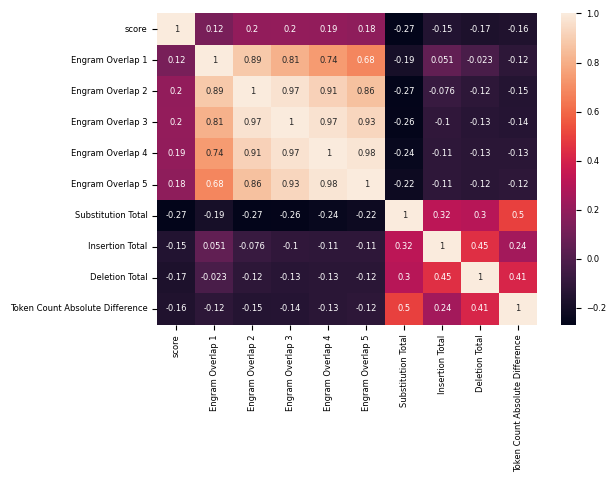

In [34]:
df['Substitution Proportion'] = df['Substitution Total'] / df['Candidate Token Count']
df['Insertion Proportion'] = df['Insertion Total'] / df['Candidate Token Count']
df['Deletion Proportion'] = df['Deletion Total'] / df['Candidate Token Count']
df['Token Count Absolute Difference'] = np.abs(df['Candidate Token Count'] - df['Reference Token Count'])
plt.rcParams.update({'font.size': 6})
sns.heatmap(df[['score', 'Engram Overlap 1', 'Engram Overlap 2', 'Engram Overlap 3', 'Engram Overlap 4', 'Engram Overlap 5', 'Substitution Total', 'Insertion Total', 'Deletion Total', 'Token Count Absolute Difference']].dropna().corr(), annot = True)
plt.tight_layout()
plt.savefig('drive/MyDrive/W266 Final Project/correlation_heatmap.png')

In [ ]:
print("[4]"[1:-1].split(", "))

['4']


In [ ]:
np.unique(df_en['year'])

array([2020, 2021, 2022])